In [1]:
%run ../methodes/decision_tree_definition.ipynb import Decision_Tree_
import pandas as pd

In [2]:
df_train = pd.read_csv('../leaf-classification/train.csv/train.csv').set_index('id')
df_test = pd.read_csv('../leaf-classification/test.csv/test.csv').set_index('id')

In [3]:
# Le terme de régularisation (penalty) est l'une des 3 fonctions suivantes
criterions = ['gini', 'entropy', 'log_loss']

# Le coût minimum de complexité d'élagage doit être un réel non-négatif
ccp_alphas = np.linspace(0.0001, 0.1, 10)

In [4]:
# Initialisation des meilleurs paramètres
err_min = 100
best_criterion = 'Nothing'
best_ccp_alpha = -1

In [5]:
# Initialisation des tableaux pour l'analyse des données
df_dt_train = pd.DataFrame(0, index=criterions, columns=ccp_alphas)
df_dt_test = pd.DataFrame(0, index=criterions, columns=ccp_alphas)

In [6]:
%%capture --no-display
from sklearn.model_selection import KFold

# Pour obtenir de bons résultats on utilise la k-fold cross-validation
kf = KFold(n_splits=10)

for criterion in criterions:
    for ccp_alpha in ccp_alphas:
        
        # Initialisation de l'erreur moyenne
        err_train = 0
        err_test = 0
            
        # k-fold cross-validation sur les données d'entraînement
        for train, test in kf.split(df_train):
            x_train = df_train.iloc[train].drop(columns=['species'])
            t_train = df_train.iloc[train]['species']
            x_test = df_train.iloc[test].drop(columns=['species'])
            t_test = df_train.iloc[test]['species']
            
            # Initialisation du perceptron
            decision_tree = Decision_Tree_(criterion, ccp_alpha)

            # Entraînement
            decision_tree.entrainement(x_train, t_train)

            # Calcul de l'erreur d'entraînement
            pred_train = decision_tree.prediction(x_train)
            err_train += decision_tree.erreur(t_train, pred_train)

            # Calcul de l'erreur de test
            pred_test = decision_tree.prediction(x_test)
            err_test += decision_tree.erreur(t_test, pred_test)

        # Calcul de l'erreur totale
        err_train /= 10
        err_test /= 10
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_dt_train[ccp_alpha][criterion] = err_train
        df_dt_test[ccp_alpha][criterion] = err_test
                
        # On met à jour les meilleurs paramètres
        if err < err_min:
            err_min = err
            best_criterion = criterion
            best_ccp_alpha = ccp_alpha     

Text(0.5, 1.0, 'log loss')

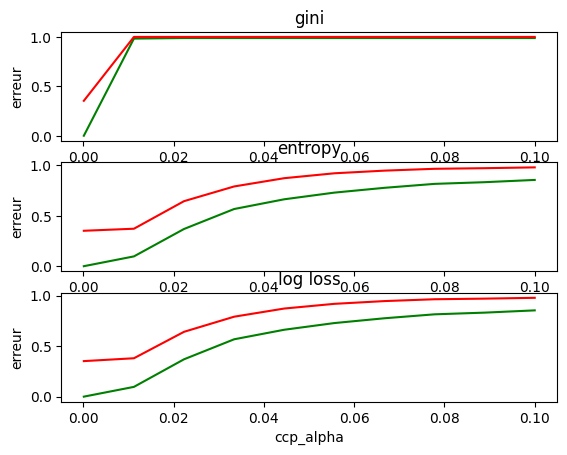

In [7]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(3,1,1) # gini
plt.plot(df_dt_train.columns, df_dt_train.loc['gini'], color='green')
plt.plot(df_dt_test.columns, df_dt_test.loc['gini'], color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('erreur')
plt.title('gini')

plt.subplot(3,1,2) # entropy
plt.plot(df_dt_train.columns, df_dt_train.loc['entropy'], color='green')
plt.plot(df_dt_test.columns, df_dt_test.loc['entropy'], color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('erreur')
plt.title('entropy')

plt.subplot(3,1,3) # log_loss
plt.plot(df_dt_train.columns, df_dt_train.loc['log_loss'], color='green')
plt.plot(df_dt_test.columns, df_dt_test.loc['log_loss'], color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('erreur')
plt.title('log loss')

In [8]:
print('err_min : ', err_min, ' | criterion : ', best_criterion, ' | ccp_alpha : ', best_ccp_alpha)

err_min :  0.17525252525252524  | criterion :  entropy  | ccp_alpha :  0.0001
